Discriminante Lineal

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Carga del Set de Datos

In [17]:
data = pd.read_csv('C:/Users/Guillermo/Documents/Inferencia_Estadistica_Grupo/BBDD/Clasificacion_banco.csv')#CAMBIEN EL 
#DIRECTORIO DEL ARCHIVO


Previsualización

In [18]:
print(data.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

Se corrigen Variables Categoricas

In [19]:
data = pd.get_dummies(data, drop_first=True)


Se preparan los datos y se clasifica como Booleana a la variable target not.fully.paid

In [20]:

data['not.fully.paid'] = data['not.fully.paid'].astype(bool)

Se realiza la selección de la Variable Objetivo y sus características

In [21]:

X = data.drop(columns=['not.fully.paid'])
y = data['not.fully.paid']


Se hace el Training y la prueba

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Se Crea el Modelo de Discriminante (o determinante Lineal) LDA

In [23]:

lda = LDA()



In [24]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Se realiza el ajuste del Modelo a las caracteristicas de la Base

In [25]:
y_pred = lda.predict(X_test)


Se realiza el reporte

In [26]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.84      0.99      0.91      2408
        True       0.52      0.05      0.09       466

    accuracy                           0.84      2874
   macro avg       0.68      0.52      0.50      2874
weighted avg       0.79      0.84      0.78      2874



El resultado del informe muestra que el modelo tiene una alta precisión para predecir los casos donde not.full.payd es False (0.84), pero un rendimiento muy bajo para predecir cuando es True (0.52 de precisión y 0.05 de recall). El recall bajo para True indica que el modelo falla en identificar correctamente estos casos, y el f1-score de 0.09 refleja este desequilibrio. Aunque la precisión general es del 84%, el modelo tiene dificultades con la clase minoritaria (True), lo que puede deberse al desbalance en las clases.

In [27]:
cm = confusion_matrix(y_test, y_pred)


Grafico de la Matriz de Confusión

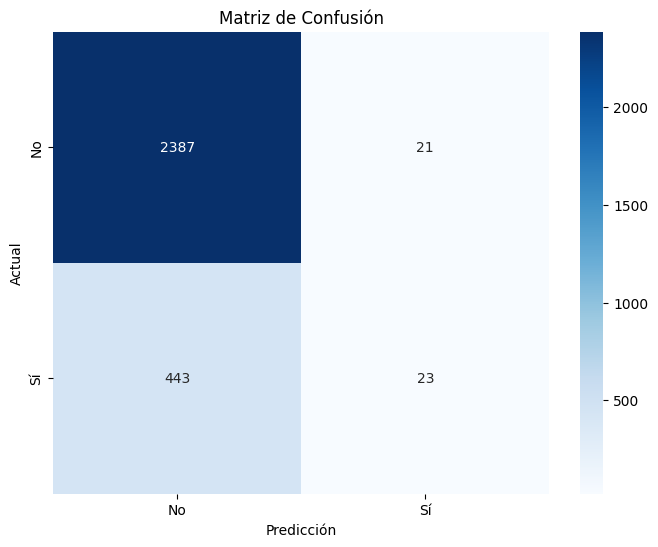

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

Visualiación del rendimiento del modelo en términos de tasa de verdaderos positivos y tasa de falsos positivos.

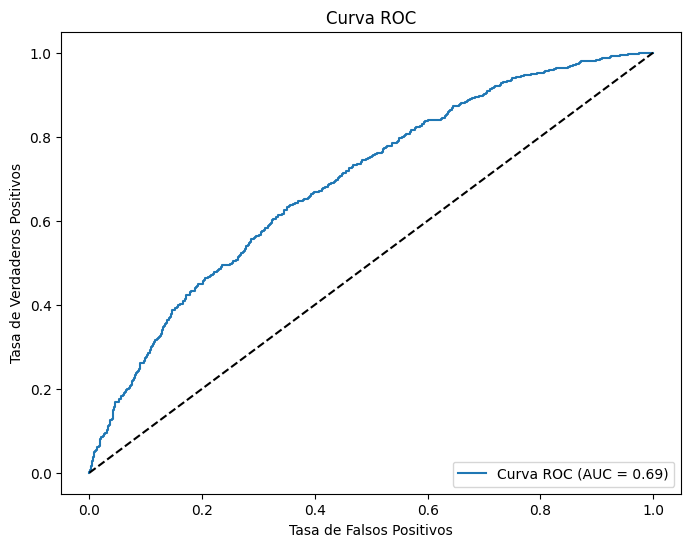

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción para la clase positiva
y_scores = lda.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Curva de Precisión-Recuperación
Esta curva es más informativa cuando hay un desequilibrio de clases como en este caso con este algoritmo

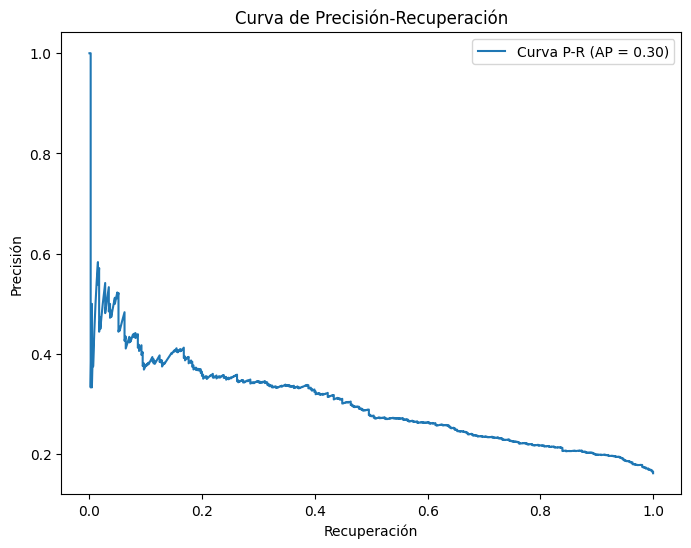

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular precisión y recuperación para diferentes umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calcular el Average Precision Score
average_precision = average_precision_score(y_test, y_scores)

# Graficar la curva de precisión-recuperación
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Curva P-R (AP = {average_precision:.2f})')
plt.xlabel('Recuperación')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recuperación')
plt.legend(loc='upper right')
plt.show()


 Un área bajo la curva más alta indica mejor rendimiento

Visualización de las Discriminantes Lineales

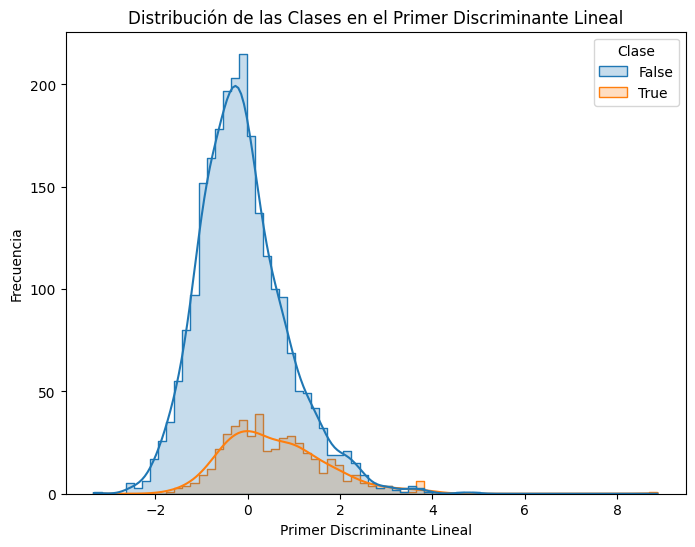

In [31]:
import numpy as np

# Transformación los datos de prueba al espacio LDA
X_test_lda = lda.transform(X_test)

# Creación un DataFrame para facilitar la visualización
df_lda = pd.DataFrame()
df_lda['LD1'] = X_test_lda[:, 0]
df_lda['Clase'] = y_test.reset_index(drop=True)

# Graficación de las distribuciones
plt.figure(figsize=(8, 6))
sns.histplot(data=df_lda, x='LD1', hue='Clase', kde=True, element='step')
plt.title('Distribución de las Clases en el Primer Discriminante Lineal')
plt.xlabel('Primer Discriminante Lineal')
plt.ylabel('Frecuencia')
plt.show()


Si las distribuciones de las clases se superponen mucho, el modelo tiene dificultad para separarlas

 Gráfico de Importancia de las Características

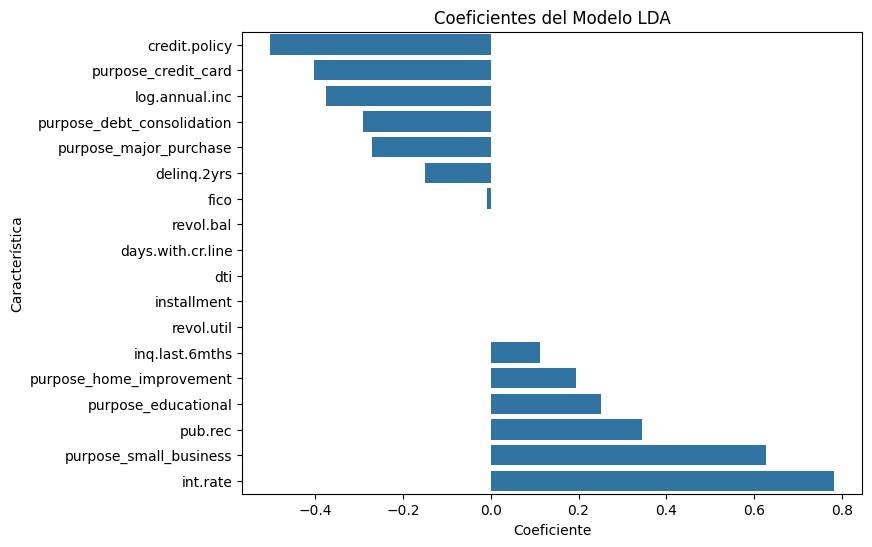

In [32]:
# Extraer los coeficientes del modelo
coef_df = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': lda.coef_[0]
})

# Graficar los coeficientes
plt.figure(figsize=(8, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coef_df.sort_values(by='Coeficiente'))
plt.title('Coeficientes del Modelo LDA')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()


DISCRIMINANTE CUADRÁTICO QDA

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Crear el modelo de QDA
qda = QuadraticDiscriminantAnalysis()

# Ajustar el modelo
qda.fit(X_train, y_train)

# Hacer predicciones
y_pred_qda = qda.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_qda))


              precision    recall  f1-score   support

       False       0.86      0.87      0.86      2408
        True       0.28      0.28      0.28       466

    accuracy                           0.77      2874
   macro avg       0.57      0.57      0.57      2874
weighted avg       0.77      0.77      0.77      2874



Los resultados del Análisis Discriminante Lineal (LDA) y el Análisis Discriminante Cuadrático (QDA) presentan similitudes y diferencias notables en relación a "no pagado completamente":

Precisión y Recall: LDA muestra un mejor rendimiento en la clase "pagado completamente" (0.84 de precisión) y un rendimiento más bajo en "no pagado completamente" (0.52). QDA tiene un mejor rendimiento para "pagado completamente" (0.86), pero un rendimiento inferior en "no pagado completamente" (0.28).

F1-Score: Ambos modelos tienen un F1-score similar para "pagado completamente", pero QDA presenta un desempeño inferior en "no pagado completamente".

Accuracy: LDA tiene una exactitud del 84%, mientras que QDA muestra 77%.

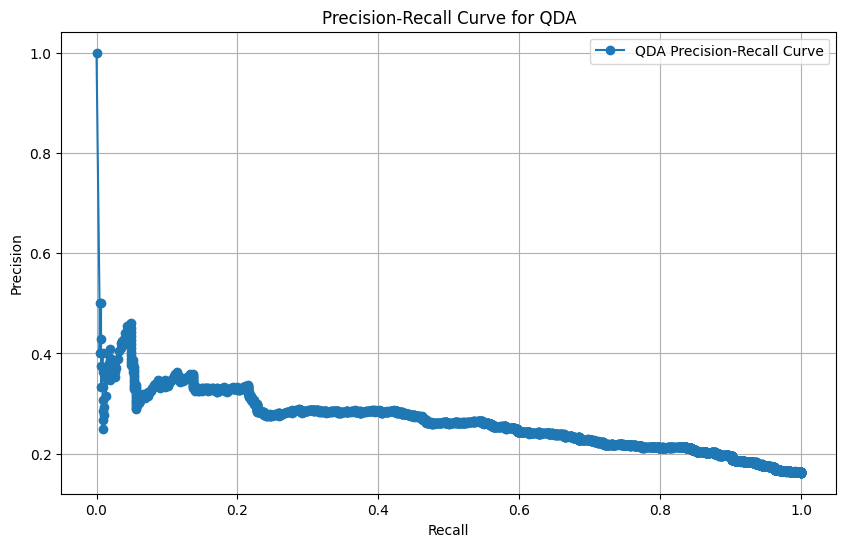

In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predecir las probabilidades para la clase positiva
y_scores = qda.predict_proba(X_test)[:, 1]

# Calcular precisión y recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='o', label='QDA Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for QDA')
plt.legend()
plt.grid()
plt.show()


La coordenada 𝑥=0 𝑦=1 significa que, con un umbral de decisión de 0, el modelo clasifica todas las instancias como positivas, logrando una precisión perfecta. A medida que el umbral aumenta entre 0 y 0.2, el recall (capacidad de detectar verdaderos positivos) se mantiene alto, pero al llegar a 𝑥=1, la precisión disminuye notablemente. Esto refleja el típico trade-off (compensación) entre precisión y recall en modelos de clasificación